## Ensemble Learning and Random Forests

- An __Ensemble__ is a group of predictors. 
- An __Ensemble Learning Algorithm__, or __Ensemble Method__, refers to the technique of using an ensemble to obtain better predictions than with any one of the individual predictors. This technique works particularly well if the individual predictors that make up the ensemble make different types of errors.

- A __Decision Tree__ contains decision nodes, where the data are split according to certain parameters, and leaves, which encode the final outcomes. 
- An ensemble of Decision Trees is called a __Random Forest__. Random Forests take the predictions of the individual decision trees in the ensemble and output the prediction with the most 'votes', i.e. the most common classification predicted by the decision trees. 

- __Bagging and Pasting__ refers to the technique of training the classifiers on the same algorithm, but on different (random) subsets of the training data, which allows for us to sample training instances multiple times across multiple predictors. Note that while __Bagging__ refers to sampling with replacement, __Pasting__ performs sampling without replacement. 

### In this module, we:
1. Train a voting classifier in Scikit-Learn, composed of the Random Forest, SVC (Support Vector Classification), and MLP (Multi-layer Perceptron) Classifiers, and
2. Train a bagging classifier in Scikit-Learn via a Decision Tree Classifier. 

-------

The following packages are required to run the attached code:

- [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html)
- [sklearn.svm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [sklearn.neural_network](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
- [sklearn.datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [sklearn.model_selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

In [1]:
# import the data
from sklearn.datasets import make_classification

# import the relevant libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

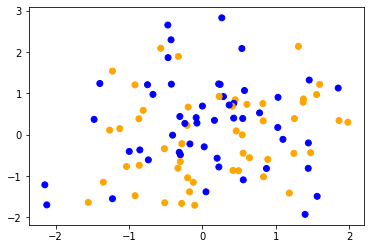

In [19]:
X, y = make_classification()
colors = ["blue" if label == 1 else "orange" for label in y] 
plt.scatter(X[:, 0], X[:, 1], c = colors)

In [20]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

---

In the code below, we obtain what is referred to as a __Hard Voting Classifier__ by taking each prediction made by each classifier in the ensemble and predicting the class that gets the most votes. 

We expect this majority-vote classifier to achieve a higher accuracy than the other classifiers in the ensemble.

---

In [21]:
rand_clf = RandomForestClassifier()
svm_clf = SVC()
mlp_clf = MLPClassifier()
voting_clf = VotingClassifier(estimators = [('lr', mlp_clf), ('svm', svm_clf), ('rf', rand_clf)], voting = 'hard')

voting_clf.fit(X_train, y_train)

/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier(estimators=[('lr', MLPClassifier()), ('svm', SVC()),
                             ('rf', RandomForestClassifier())])

In [22]:
from sklearn.metrics import accuracy_score
for clf in [svm_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

SVC, accuracy score = 0.92


/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier, accuracy score = 0.8
RandomForestClassifier, accuracy score = 0.92


/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier, accuracy score = 0.96


---

As expected, the Voting Classifier has a higher accuracy score than the others. Now, in the following code, we train the __Bagging Ensemble__:

---

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Change "bootstrap" to "False" if Pasting, instead of Bagging.
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=70, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

---

While the Bagging Classifier obtains a very higher accuracy (92%), the Voting Classifier still outperforms it.

---